In [1]:
%load_ext autoreload
%autoreload 2
%cd "~/deepshape/deepshape"

/home/jorgen/deepshape/deepshape


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from curves import *
from layers import *
from visual import *
from palais_layer import *
from relu_layer import * 
from networks import ReparametrizationNetwork1D, train

In [4]:
# Figures folder
figdir = "/home/jorgen/deepshape/figures/infinity/"

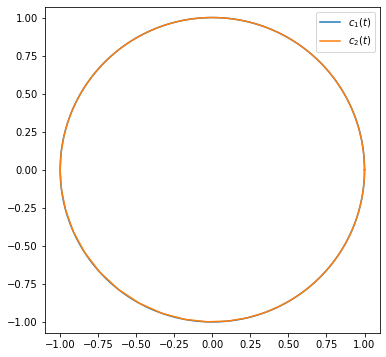

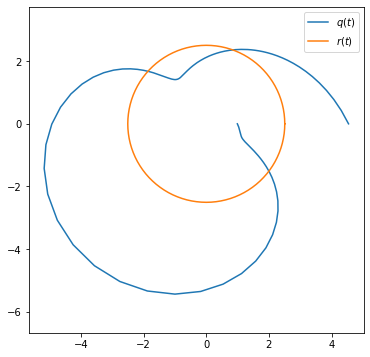

In [5]:
# Instantiate curves and transforms (from curves library)
g = LogStepDiff
c1 = Circle
c2 = c1.compose(g)

# Take Qmaps
q, r = Qmap(c2), Qmap(c1)

fig, ax = plt.subplots(figsize=(6,6))
plot_curve(c1, ax=ax, label="$c_1(t)$")
plot_curve(c2, ax=ax, label="$c_2(t)$")
plt.legend()
plt.axis("equal")
plt.savefig(figdir + "curves.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
plot_curve(q, ax=ax, label="$q(t)$")
plot_curve(r, ax=ax, label="$r(t)$")
plt.legend()
plt.axis("equal")
plt.savefig(figdir + "srvts.pdf")
plt.show()

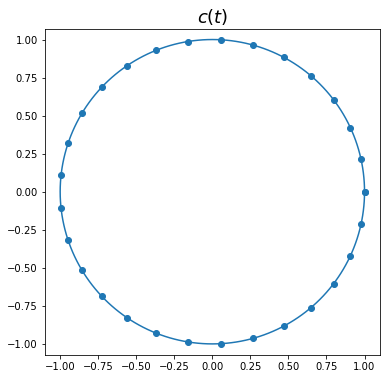

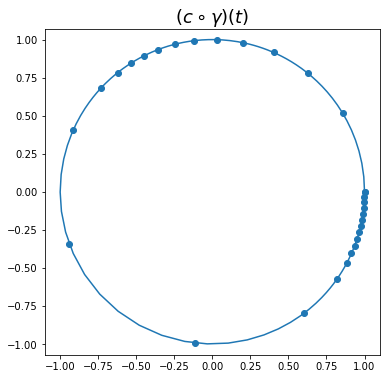

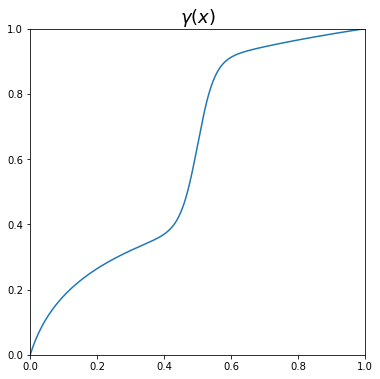

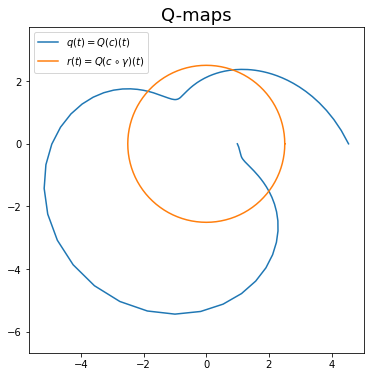

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_curve(c1, ax=ax, dotpoints=30)
ax.set_title("$c(t)$", fontsize=18)
ax.axis("equal")
plt.savefig(figdir + "curve.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
plot_curve(c2, ax=ax, dotpoints=30)
ax.set_title("$(c\circ\gamma)(t)$", fontsize=18)
ax.axis("equal")
plt.savefig(figdir + "curve-reparametrized.pdf")
plt.show()

x = linspace(401)
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x, g(x))
plt.xlim(0, 1)
plt.ylim((0, 1))
ax.set_title("$\gamma(x)$", fontsize=18)
plt.savefig(figdir + "reparametrization.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
plot_curve(q, ax=ax, label="$q(t) = Q(c)(t)$")
plot_curve(r, ax=ax, label="$r(t) = Q(c\circ\gamma)(t)$")
plt.legend()
plt.axis("equal")
plt.title("Q-maps", fontsize=18)
plt.savefig(figdir + "qmaps.pdf")
plt.show()

In [7]:
RN = ReparametrizationNetwork1D(4, 10, init_scale=0.0)
opt = optim.SGD(RN.parameters(), lr=1e-4)
error = train(q, r, RN, opt, loss=nn.MSELoss(), iterations=500, npoints=1024, log_every=50)

K = 1024
z, y, Q, R = get_plot_data1D(q, r, RN, K)
x = linspace(K)

[Iter     1] loss: 2.80092
[Iter    51] loss: 0.35130
[Iter   101] loss: 0.08200
[Iter   151] loss: 0.01648
[Iter   201] loss: 0.00376
[Iter   251] loss: 0.00154
[Iter   301] loss: 0.00104
[Iter   351] loss: 0.00084
[Iter   401] loss: 0.00073
[Iter   451] loss: 0.00065

Finished training in 2.06570s


In [13]:
RN = ReparametrizationNetwork1D(1, 30, layer_type=TangentReluLayer1D)
opt = optim.SGD(RN.parameters(), lr=1e-3)
error = train(q, r, RN, opt, loss=nn.MSELoss(), iterations=500, npoints=1024, log_every=50)

K = 1024
z, y, Q, R = get_plot_data1D(q, r, RN, K)
x = linspace(K)

[Iter     1] loss: 3.06677
[Iter    51] loss: 1.48167
[Iter   101] loss: 1.35715
[Iter   151] loss: 1.33134
[Iter   201] loss: 1.32222
[Iter   251] loss: 1.31935
[Iter   301] loss: 1.31793
[Iter   351] loss: 1.31716
[Iter   401] loss: 1.31674
[Iter   451] loss: 1.31645

Finished training in 1.50286s


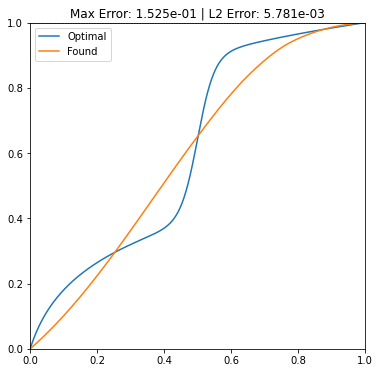

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(x, g(x), label="Optimal")
plt.plot(x, z, label="Found")
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axhline(0, ls="--", lw=0.5, c="k")
plt.axhline(1, ls="--", lw=0.5, c="k")
plt.savefig(figdir + "reparametrization-compare.pdf")
plt.title(f"Max Error: {torch.abs(z - g(x)).max():.3e} | L2 Error: {nn.MSELoss()(z, g(x)):.3e}")
plt.show()

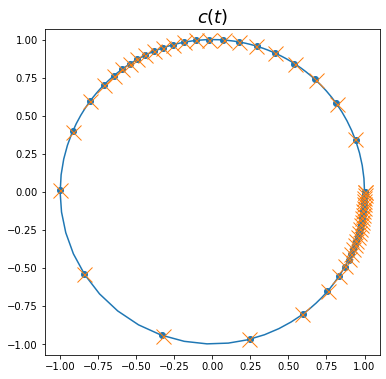

In [9]:
c3 = c1.compose(lambda x: RN(x)[0].detach())

fig, ax = plt.subplots(figsize=(6, 6))
plot_curve(c3, ax=ax, dotpoints=50)
plot_curve(c2, ax=ax, marker='x', npoints=50, ls='none', ms=15)
ax.set_title("$c(t)$", fontsize=18)
ax.axis("equal")
plt.savefig(figdir + "curve-reparametrized-after.pdf")
plt.show()

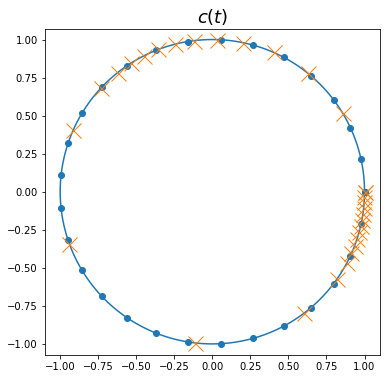

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_curve(c1, ax=ax, dotpoints=30)
plot_curve(c2, ax=ax, marker='x', npoints=30, ls='none', ms=15)
ax.set_title("$c(t)$", fontsize=18)
ax.axis("equal")
plt.savefig(figdir + "curve-reparametrized-before.pdf")
plt.show()

In [ ]:
figdir = "/home/jorgen/deepshape/figures/infinity_palais/"

In [7]:
RN = ReparametrizationNetwork1D(4, 10, init_scale=0.0)
opt = optim.SGD(RN.parameters(), lr=1e-4)
error = train(q, r, RN, opt, loss=nn.MSELoss(), iterations=500, npoints=1024, log_every=50)

K = 1024
z, y, Q, R = get_plot_data1D(q, r, RN, K)
x = linspace(K)

[Iter     1] loss: 2.80092
[Iter    51] loss: 0.35130
[Iter   101] loss: 0.08200
[Iter   151] loss: 0.01648
[Iter   201] loss: 0.00376
[Iter   251] loss: 0.00154
[Iter   301] loss: 0.00104
[Iter   351] loss: 0.00084
[Iter   401] loss: 0.00073
[Iter   451] loss: 0.00065

Finished training in 2.10945s


In [16]:
RN = ReparametrizationNetwork1D(4, 10, init_scale=0.0, layer_type=PalaisLayer1D)
opt = optim.SGD(RN.parameters(), lr=1e-3)
error = train(q, r, RN, opt, loss=nn.MSELoss(), iterations=500, npoints=1024, log_every=50)

K = 1024
z, y, Q, R = get_plot_data1D(q, r, RN, K)
x = linspace(K)

[Iter     1] loss: 2.80092
[Iter    51] loss: 0.00983
[Iter   101] loss: 0.00147
[Iter   151] loss: 0.00100
[Iter   201] loss: 0.00088
[Iter   251] loss: 0.00080
[Iter   301] loss: 0.00074
[Iter   351] loss: 0.00069
[Iter   401] loss: 0.00064
[Iter   451] loss: 0.00061

Finished training in 2.04439s
